Case Study: The bank contacted its clients by phone to promote a term deposit product  (a long-term savings account).
Each row in the dataset is one client contact, with their demographic info, call details, and campaign outcomes.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [3]:
df=pd.read_csv('bank_combined.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


age: Age of the customer. (Integer)  
job: Type of job the customer has. (String)  
marital: Marital status of the customer. (String)  
education: Education level of the customer. (String)  
default: Whether or not the customer has a default on their credit. (Boolean)  
balance: Balance of the customer's bank account. (Integer)  
housing: Whether or not the customer has a housing loan. (Boolean)  
housing: Whether or not the customer has a housing loan. (Boolean)  
contact: Type of contact used to reach the customer. (String)  
day: Day of the week the customer was contacted. (Integer)  
month: Month of the year the customer was contacted. (String)  
duration: Length of the call with the customer. (Integer)  
campaign: Number of contacts performed during this campaign and previous ones. (Integer)  
pdays: Number of days that passed by after the customer was last contacted from a previous campaign. (Integer)  
campaign: Number of contacts performed during this campaign and previous ones. (Integer)  
poutcome: Outcome of the previous marketing campaign. (String)  
job: Type of job the customer has. (String)  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


### Data Cleaning

In [5]:
#Checking missing values
for col in df.columns:
    missing_count = df[col].isna().sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} missing values")
    else:
        print(f'No Missing Values in {col} ')

No Missing Values in age 
No Missing Values in job 
No Missing Values in marital 
No Missing Values in education 
No Missing Values in default 
No Missing Values in balance 
No Missing Values in housing 
No Missing Values in loan 
No Missing Values in contact 
No Missing Values in day 
No Missing Values in month 
No Missing Values in duration 
No Missing Values in campaign 
No Missing Values in pdays 
No Missing Values in previous 
No Missing Values in poutcome 
No Missing Values in y 


In [6]:
#checking data types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
#Checking normal distribution for column age
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers=df[(df['age']<lower_bound)|(df['age']>upper_bound)]
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR: {iqr}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of outliers: {len(outliers)}")

Q1 (25th percentile): 33.0
Q3 (75th percentile): 48.0
IQR: 15.0
Lower Bound: 10.5
Upper Bound: 70.5
Number of outliers: 541


In [8]:
#percentage of outlier
outlier_percentage=(len(outliers)/len(df))*100
print(f"Percentage of outliers in 'age' column: {outlier_percentage:.2f}%")

Percentage of outliers in 'age' column: 1.09%


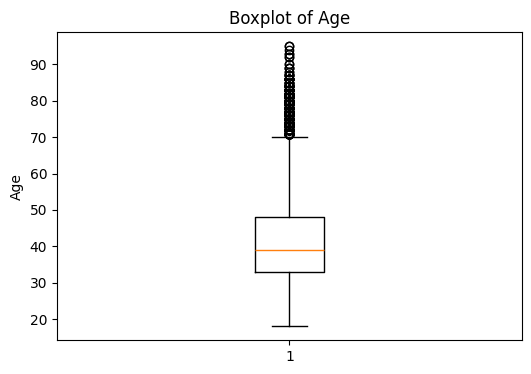

In [9]:
#Visualize the age distribution
plt.figure(figsize=(6, 4))
plt.boxplot(df['age'].dropna())
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

We decide not to drop the outliers in the age column because they represent valid data points that reflect the diversity of the customer base.
Beside of that, the outliers are not strange like 666 or -50, so we can keep them for further analysis.

In [10]:
#chcking unique values in marital column
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

Unique values in the marital column are normal and do not require further cleaning

In [11]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [12]:
unknown_job_count = (df['job'] == 'unknown').sum()
total_count = len(df)
unknown_percent = (unknown_job_count / total_count) * 100
print(f'Unknkown job count: {unknown_job_count}')
print(f'Percentage of unknown job: {unknown_percent:.2f}%')

Unknkown job count: 326
Percentage of unknown job: 0.66%


In [13]:
unknown_job_age_stats = df[df['job'] == 'unknown']['age'].describe()
print(unknown_job_age_stats)

count    326.000000
mean      47.653374
std       10.717610
min       25.000000
25%       41.000000
50%       47.000000
75%       55.000000
max       82.000000
Name: age, dtype: float64


C:\Users\amali\AppData\Local\Temp\ipykernel_24308\787209894.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


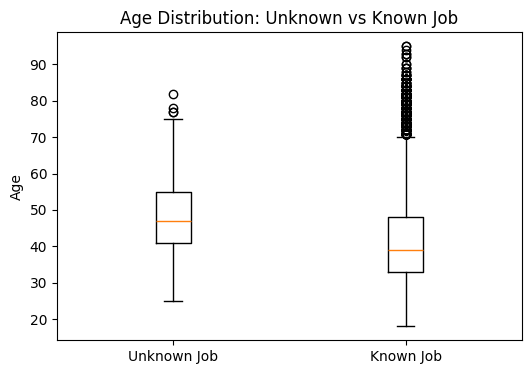

In [14]:

plt.figure(figsize=(6,4))
plt.boxplot([
    df[df['job'] == 'unknown']['age'],
    df[df['job'] != 'unknown']['age']
], labels=['Unknown Job', 'Known Job'])

plt.title('Age Distribution: Unknown vs Known Job')
plt.ylabel('Age')
plt.show()

In [15]:
mean_unknown = df[df['job'] == 'unknown']['age'].mean()
mean_known = df[df['job'] != 'unknown']['age'].mean()

print(f"Mean age (unknown job): {mean_unknown:.1f}")
print(f"Mean age (known job): {mean_known:.1f}")


Mean age (unknown job): 47.7
Mean age (known job): 40.9


In [16]:
#checking unique values in month column
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

Unique values in month column are normal and do not require further cleaning

**Negative Value**

In [17]:
(df.select_dtypes(include='number') < 0).any()


age         False
balance      True
day         False
duration    False
campaign    False
pdays        True
previous    False
dtype: bool

In [18]:
df[df['balance'] < 0]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49685,44,blue-collar,married,primary,no,-237,yes,no,telephone,10,jul,73,1,-1,0,unknown,no
49713,42,services,married,secondary,no,-91,yes,yes,cellular,5,feb,43,1,-1,0,unknown,no
49717,42,unemployed,divorced,tertiary,no,-166,no,no,cellular,29,aug,85,4,-1,0,unknown,no
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no


In [19]:
negative_balance= (df['balance'] < 0).sum()
total_count = len(df)
negative_balance_percentage = (negative_balance / total_count) * 100
print(f'Negative Balance: {negative_balance}')
print(f'Percentage of Negative Balance: {negative_balance_percentage:.2f}%')


Negative Balance: 4132
Percentage of Negative Balance: 8.31%


In [20]:
df[df['balance'] < 0]['balance'].describe()


count    4132.000000
mean     -318.726283
std       367.642579
min     -8019.000000
25%      -423.000000
50%      -230.000000
75%       -92.000000
max        -1.000000
Name: balance, dtype: float64

Balance in bank deposite can obtain negative values due to over withdrawing, automatic payments, or other fees.

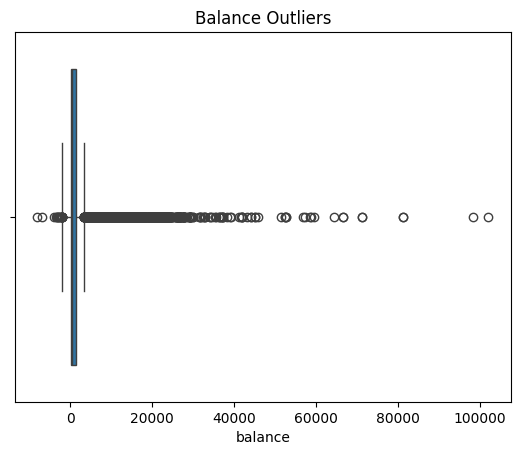

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,no
65,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,no
70,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,-1,0,unknown,no
186,40,services,divorced,unknown,no,4384,yes,no,unknown,5,may,315,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49684,33,technician,married,secondary,no,4790,yes,no,cellular,20,apr,137,1,272,2,failure,no
49700,45,management,married,tertiary,no,6945,no,no,cellular,5,aug,131,5,356,3,failure,no
49701,58,admin.,married,secondary,no,3496,yes,no,unknown,2,jun,111,4,-1,0,unknown,no
49711,38,admin.,married,secondary,no,4196,yes,no,cellular,12,may,193,2,-1,0,unknown,no


In [21]:
sns.boxplot(x=df['balance'])
plt.title("Balance Outliers")
plt.show()

Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df[(df['balance'] < lower) | (df['balance'] > upper)]


We decided to forego the negative value and lower bound negative outlier for context purposes as those with insufficient balance might show lower overturn. 

In [22]:
df[df['pdays'] < 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49724,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
49726,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no


In [23]:
df[df['pdays'] < 0]['pdays'].describe()


count    40659.0
mean        -1.0
std          0.0
min         -1.0
25%         -1.0
50%         -1.0
75%         -1.0
max         -1.0
Name: pdays, dtype: float64

In [24]:
pdays_negative= (df['pdays'] < 0).sum()
total_count = len(df)
pdays_negative_percentage = (pdays_negative/ total_count) * 100
print(f'Pdays negative: {pdays_negative}')
print(f'Percentage of Pdays: {pdays_negative_percentage:.2f}%')

Pdays negative: 40659
Percentage of Pdays: 81.76%


In [25]:
df[(df['pdays'] == -1)]['previous'].unique()


array([0])

The column Previous states the number of contacts performed before this campaign for this client. Hence, For all records where pdays == -1, the corresponding value of previous is 0. This confirms that clients who have pdays = -1 indicates that they had never contacted in a previous campaign.

**EDA for Univariate**

Text(0.5, 1.0, 'Subscription Distribution')

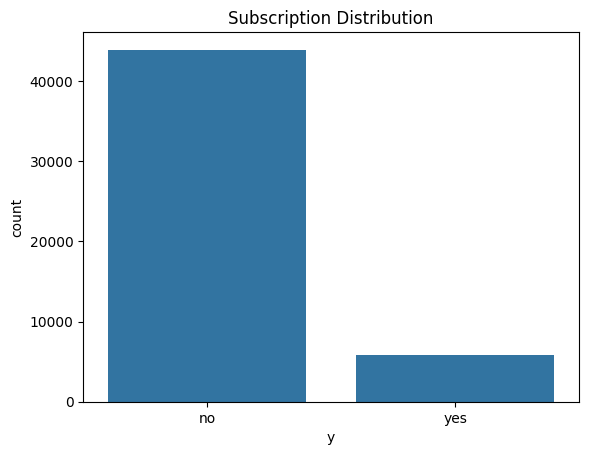

In [26]:
#distribution for targeted variable 
sns.countplot(x='y', data=df)
plt.title("Subscription Distribution")

With the low turnover for the long-term deposit program, we aim to analyze what factors might influence the decision to a "Yes"

**EDA for Univariate Variable**

Text(0.5, 1.0, 'Subscription Distribution')

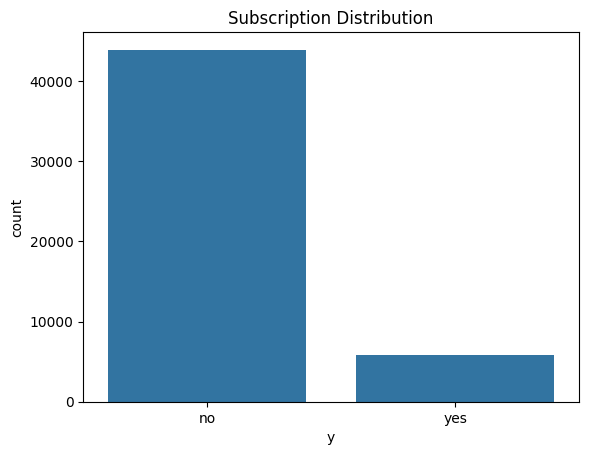

In [27]:
sns.countplot(x='y', data=df)
plt.title("Subscription Distribution")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

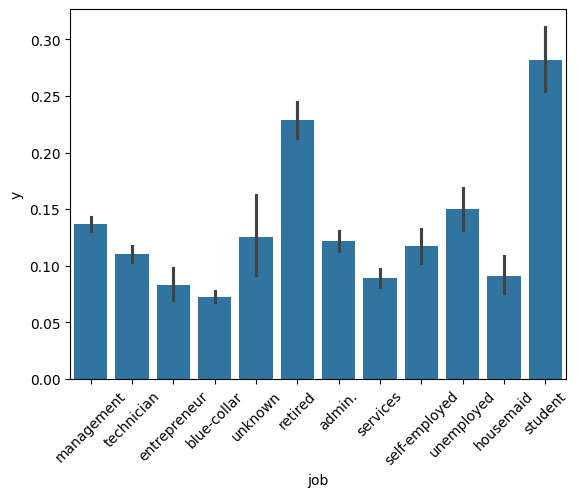

In [28]:
sns.barplot(x='job', y=df['y'].eq('yes').astype(int), data=df)
plt.xticks(rotation=45)


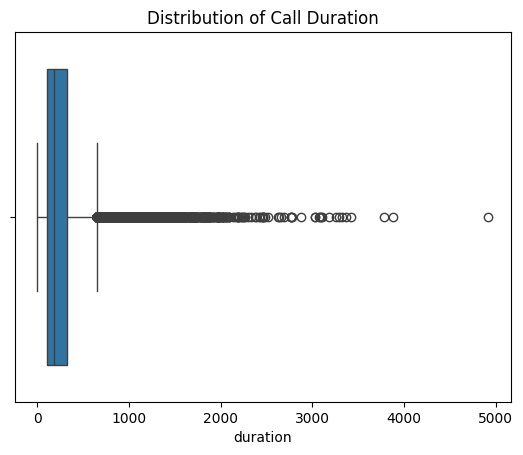

In [29]:
sns.boxplot(x=df['duration'])
plt.title("Distribution of Call Duration")
plt.show()

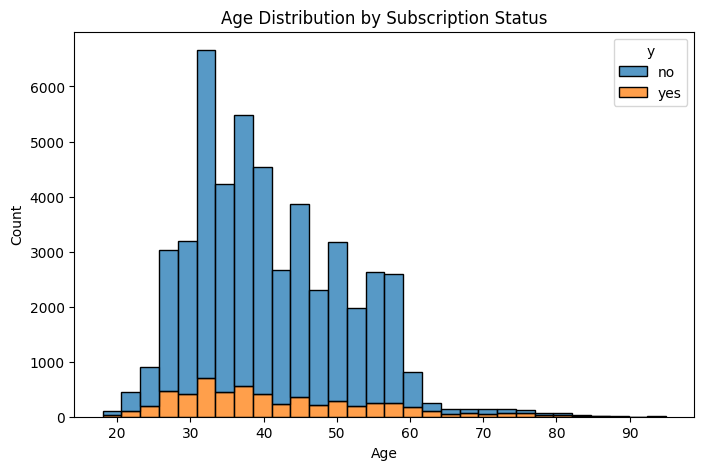

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='age', hue='y', multiple='stack', bins=30)
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


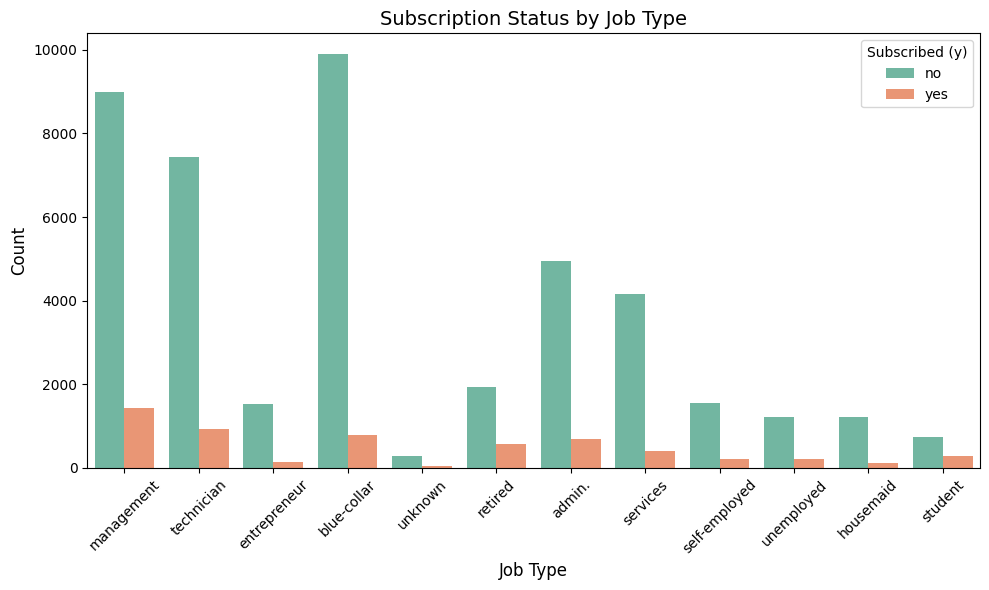

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='job', hue='y', palette='Set2')

plt.title('Subscription Status by Job Type', fontsize=14)
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Subscribed (y)')
plt.tight_layout()
plt.show()

C:\Users\amali\AppData\Local\Temp\ipykernel_24308\1644352695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['y'] == 'yes'], x='job', palette='viridis')


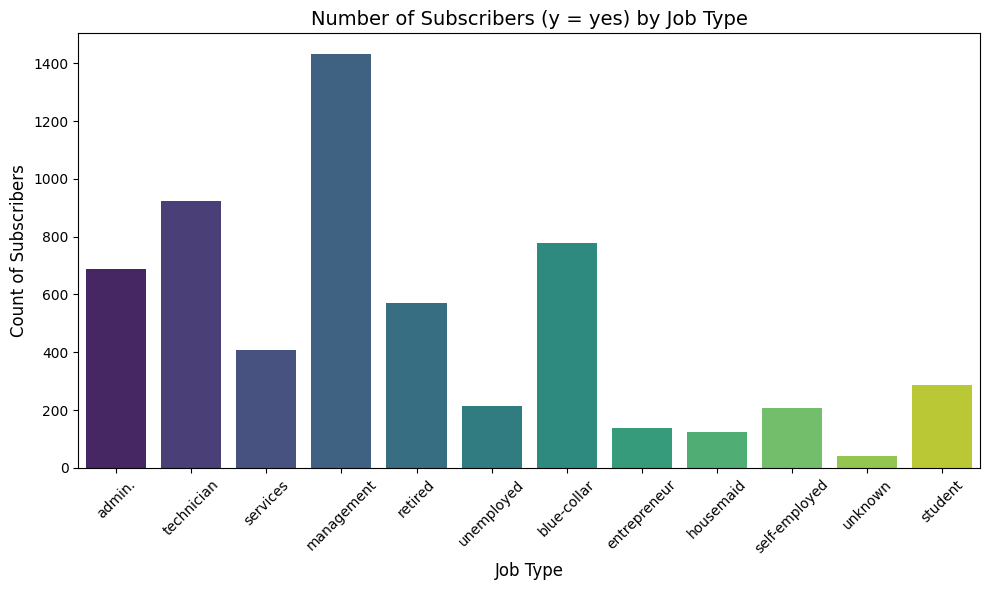

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(data=df[df['y'] == 'yes'], x='job', palette='viridis')

plt.title('Number of Subscribers (y = yes) by Job Type', fontsize=14)
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Count of Subscribers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

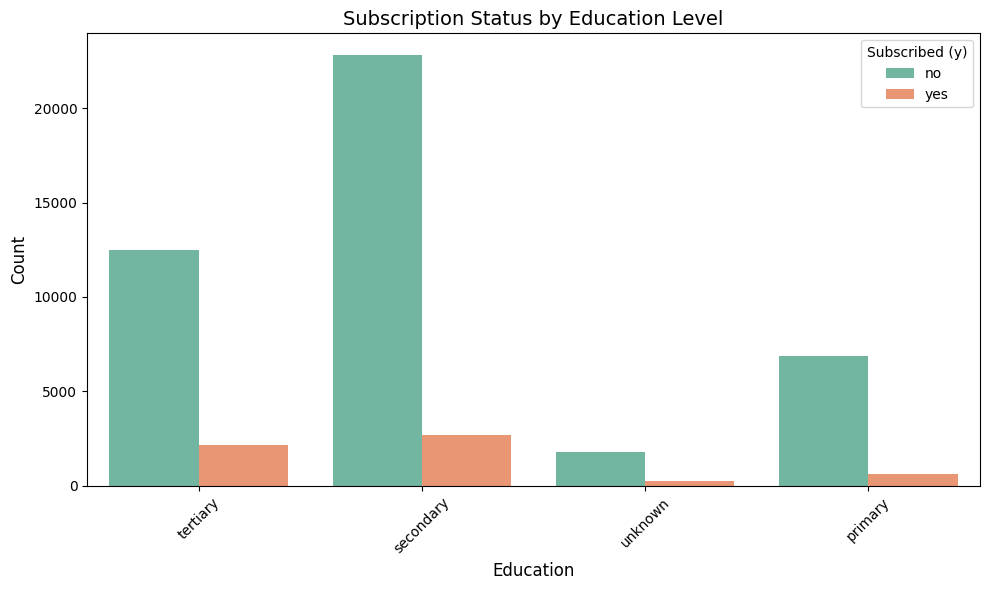

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='education', hue='y', palette='Set2')

plt.title('Subscription Status by Education Level', fontsize=14)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Subscribed (y)')
plt.tight_layout()
plt.show()

C:\Users\amali\AppData\Local\Temp\ipykernel_24308\4116679518.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['y'] == 'yes'], x='education', palette='crest')


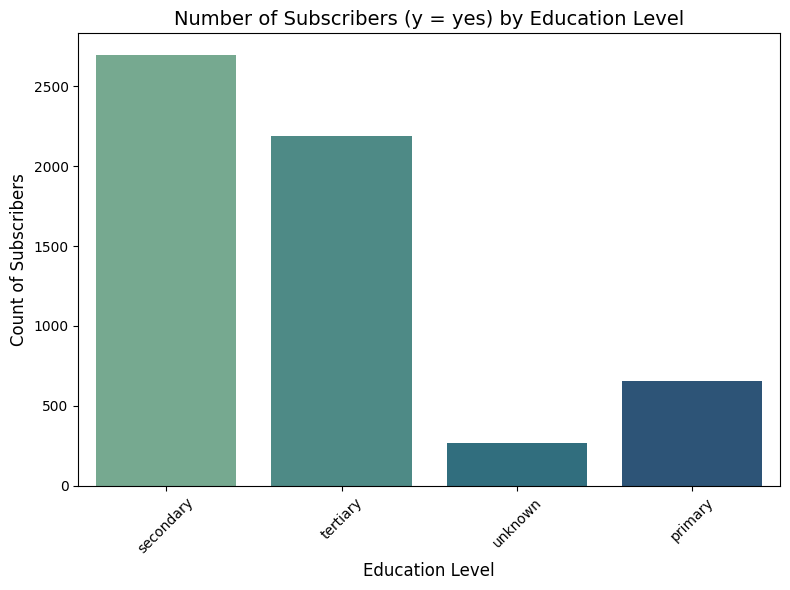

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(data=df[df['y'] == 'yes'], x='education', palette='crest')

plt.title('Number of Subscribers (y = yes) by Education Level', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count of Subscribers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

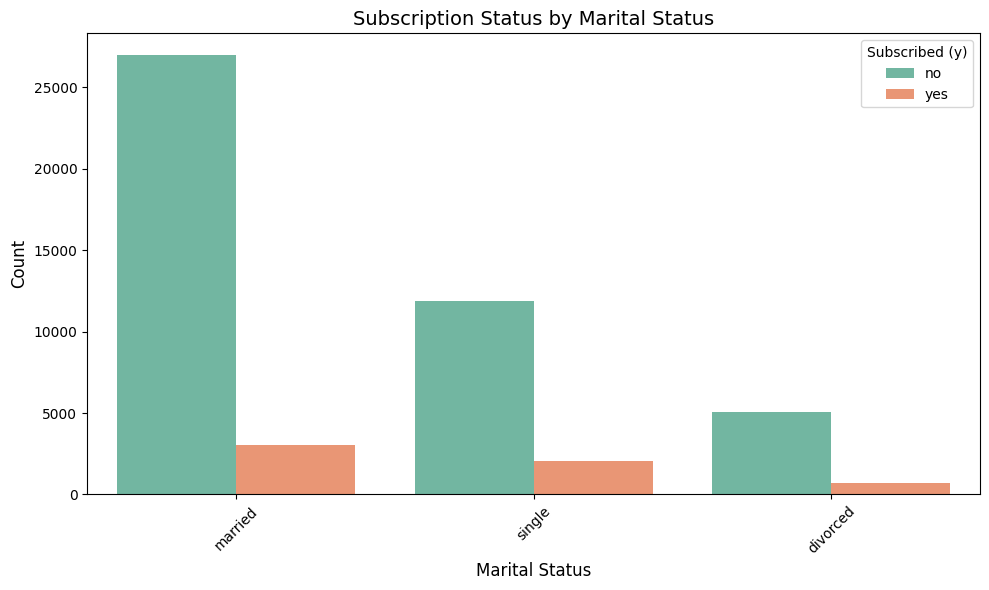

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='marital', hue='y', palette='Set2')

plt.title('Subscription Status by Marital Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Subscribed (y)')
plt.tight_layout()
plt.show()

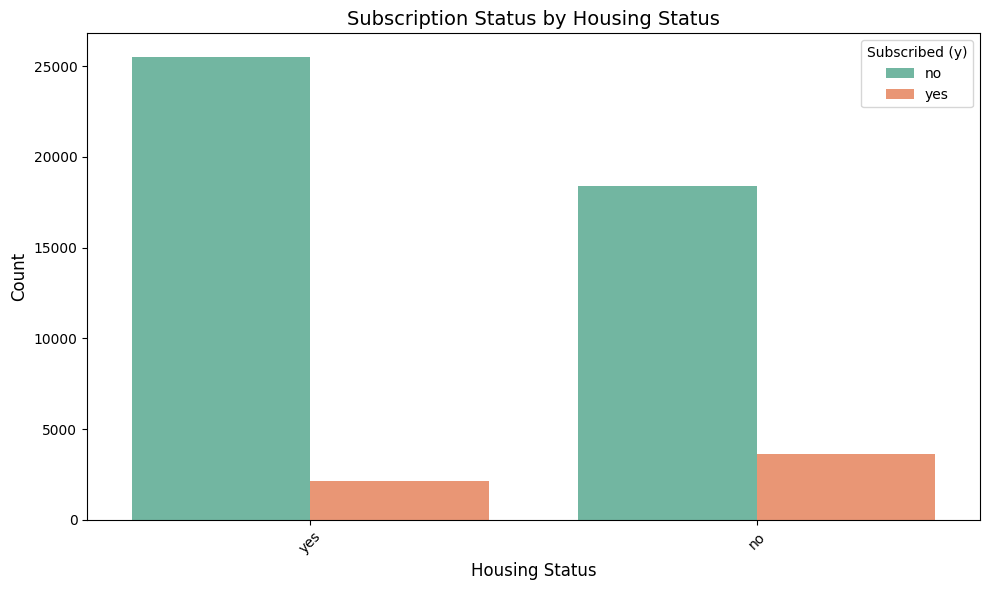

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='housing', hue='y', palette='Set2')

plt.title('Subscription Status by Housing Status', fontsize=14)
plt.xlabel('Housing Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Subscribed (y)')
plt.tight_layout()
plt.show()

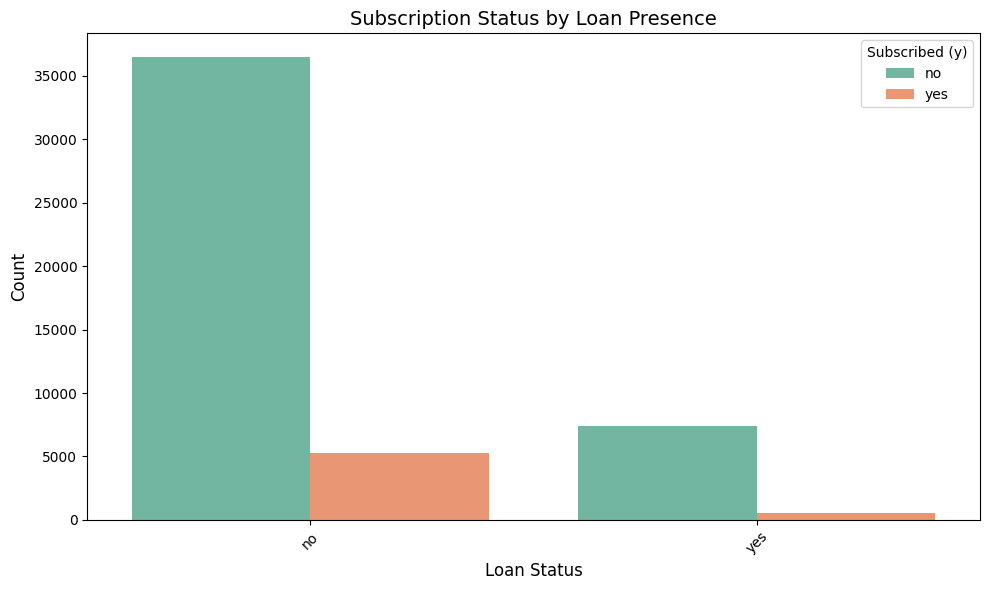

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='loan', hue='y', palette='Set2')

plt.title('Subscription Status by Loan Presence', fontsize=14)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Subscribed (y)')
plt.tight_layout()
plt.show()

In [38]:
df['y_num'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)


In [39]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,0
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,0
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,0
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,0


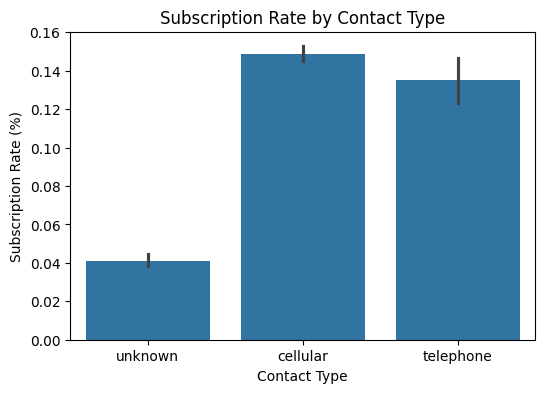

In [40]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='contact', y='y_num')
plt.title('Subscription Rate by Contact Type')
plt.ylabel('Subscription Rate (%)')
plt.xlabel('Contact Type')
plt.show()


C:\Users\amali\AppData\Local\Temp\ipykernel_24308\2709124738.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='month', y='y_num', estimator='mean', ci=None, sort=False)


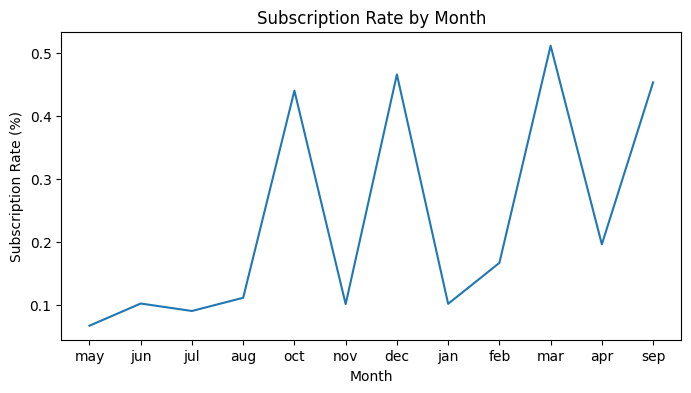

In [41]:
plt.figure(figsize=(8,4))
order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
sns.lineplot(data=df, x='month', y='y_num', estimator='mean', ci=None, sort=False)
plt.title('Subscription Rate by Month')
plt.ylabel('Subscription Rate (%)')
plt.xlabel('Month')
plt.show()


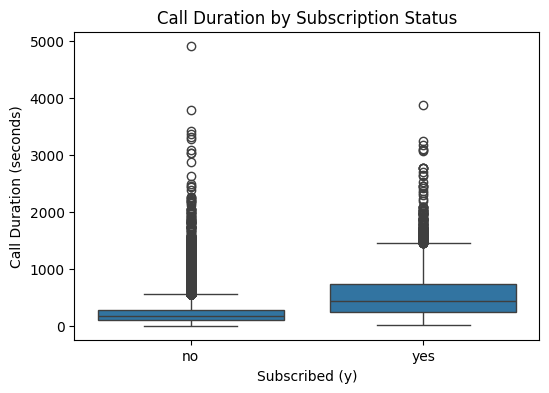

In [42]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='y', y='duration')
plt.title('Call Duration by Subscription Status')
plt.ylabel('Call Duration (seconds)')
plt.xlabel('Subscribed (y)')
plt.show()


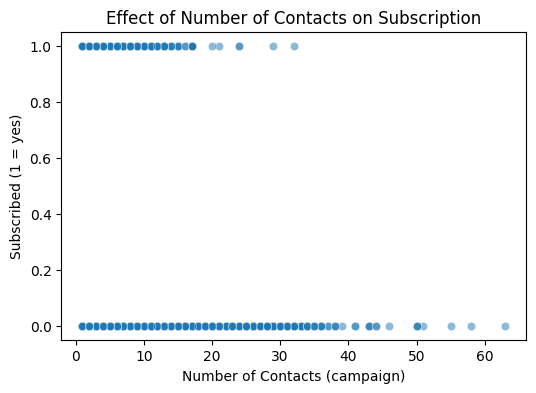

In [43]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='campaign', y='y_num', alpha=0.5)
plt.title('Effect of Number of Contacts on Subscription')
plt.xlabel('Number of Contacts (campaign)')
plt.ylabel('Subscribed (1 = yes)')
plt.show()


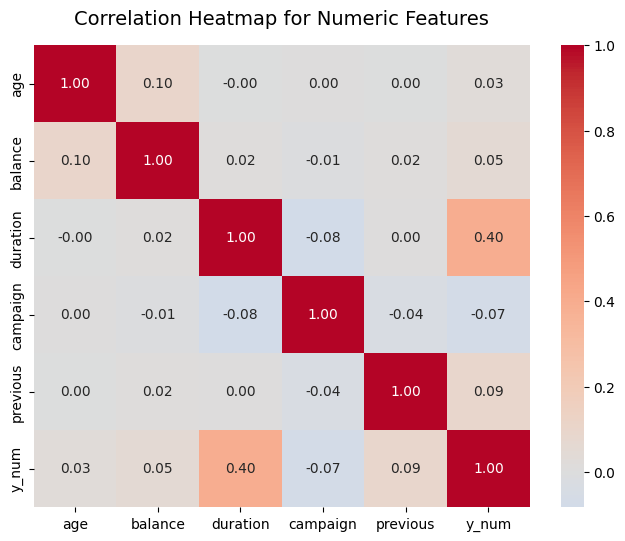

In [44]:
# Select numeric columns (exclude 'day' because it's not meaningful)
num_cols = ['age', 'balance', 'duration', 'campaign', 'previous', 'y_num']

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Heatmap for Numeric Features', fontsize=14, pad=15)
plt.show()

#note: 1 is strong and 0 is weak
Most correlation are weak, but there is one moderate correlations that worth noting:
1. duration and y_num (0.40) 
    Longer calls tend to result in a yes for term deposit subscription. we can infert that longer human interaaction may lead to better understanding and trust, increasing the likelihood of subscription. 
 


Customer Profile

In [57]:
ages = df['age'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=4, random_state=42)
df['age_cluster'] = kmeans.fit_predict(ages)

centroids = np.sort(kmeans.cluster_centers_.flatten())
print("Cluster centers:", centroids)

Cluster centers: [29.56995253 37.17044418 46.23837694 57.7463681 ]


In [58]:
cluster_labels = {
    0: 'Young Adults (<30)',
    1: 'Professionals (30–45)',
    2: 'Mid-Lifers (45–60)',
    3: 'Seniors (60+)'
}

df['age_segment'] = df['age_cluster'].map(cluster_labels)


In [61]:
df[['age', 'age_cluster', 'age_segment','job','y']].sample(10)


,age,age_cluster,age_segment,job,y
10690,47,3,Seniors (60+),blue-collar,no
5303,30,1,Professionals (30–45),blue-collar,no
19081,38,2,Mid-Lifers (45–60),management,no
43653,77,0,Young Adults (<30),unknown,yes
5567,38,2,Mid-Lifers (45–60),admin.,no
37920,31,1,Professionals (30–45),management,no
36784,51,3,Seniors (60+),blue-collar,no
43272,26,1,Professionals (30–45),admin.,no
31669,41,2,Mid-Lifers (45–60),admin.,no
12937,52,0,Young Adults (<30),blue-collar,no


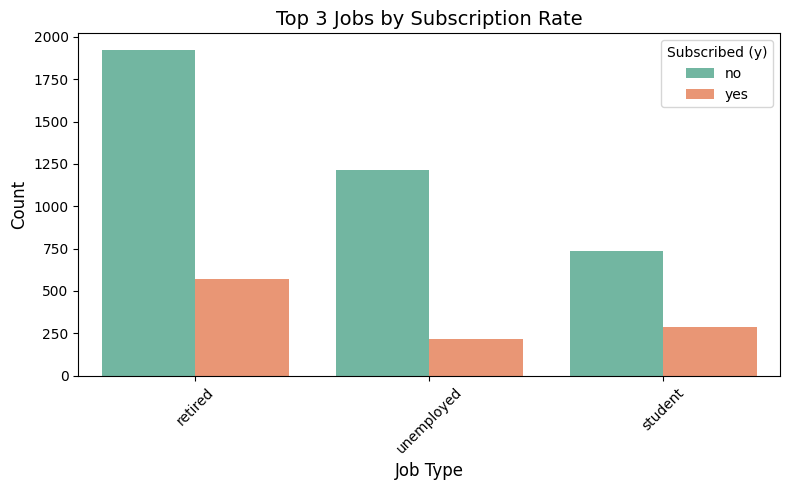

In [62]:
top_jobs = (
    df.groupby('job')['y']
    .apply(lambda x: (x == 'yes').mean())
    .nlargest(3)
    .index
)
filtered_df = df[df['job'].isin(top_jobs)]

plt.figure(figsize=(8,5))
sns.countplot(data=filtered_df, x='job', hue='y', palette='Set2')

plt.title('Top 3 Jobs by Subscription Rate', fontsize=14)
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Subscribed (y)')
plt.tight_layout()
plt.show()


These job categories are the demographic of people who lean towards stable, predictable returns, capital preservation, and a low-risk way to manage their savings

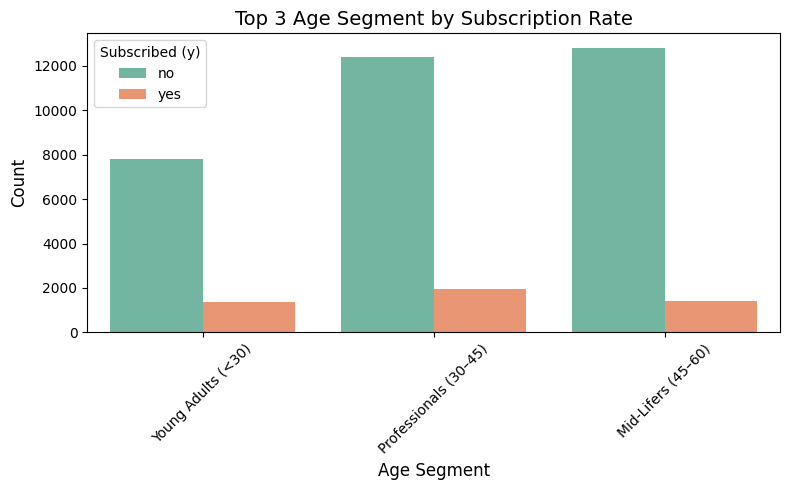

In [66]:
top_age = (
    df.groupby('age_segment')['y']
    .apply(lambda x: (x == 'yes').mean())
    .nlargest(3)
    .index
)
filtered_df = df[df['age_segment'].isin(top_age)]

plt.figure(figsize=(8,5))
sns.countplot(data=filtered_df, x='age_segment', hue='y', palette='Set2')

plt.title('Top 3 Age Segment by Subscription Rate', fontsize=14)
plt.xlabel('Age Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Subscribed (y)')
plt.tight_layout()
plt.show()


In [67]:
df.groupby('y')['balance'].mean()


y
no     1312.776194
yes    1783.435800
Name: balance, dtype: float64

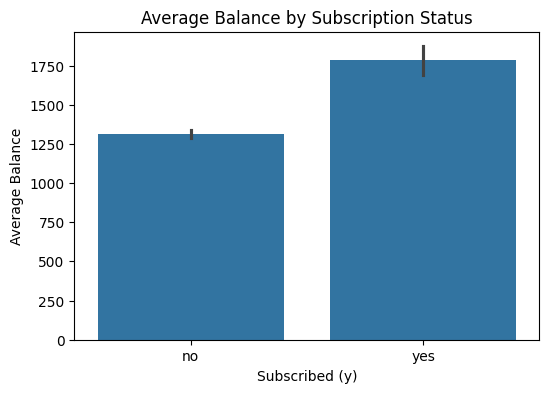

In [68]:
plt.figure(figsize=(6,4))
sns.barplot(x='y', y='balance', data=df)
plt.title('Average Balance by Subscription Status')
plt.ylabel('Average Balance')
plt.xlabel('Subscribed (y)')
plt.show()


Older, educated, and higher-balance customers are more likely to subscribe.